# Working sheet
## 07 - MMRM - Mixed model repeated measures
V07.01.00 - 2024-02-26

## Load data
Change the path and the filename in the following box.

In [78]:
library(readr)
df <- read_csv("data/df07.csv",
               show_col_types = FALSE,
               na = "."
              )


Look at the structure and the head of the dataset.

In [79]:
str(df)

spc_tbl_ [400 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ USUBJID: chr [1:400] "Subject_0001" "Subject_0002" "Subject_0003" "Subject_0004" ...
 $ Group  : chr [1:400] "Group_1" "Group_2" "Group_1" "Group_2" ...
 $ Time   : chr [1:400] "Time_1" "Time_1" "Time_1" "Time_1" ...
 $ Y_comp : num [1:400] -0.0767 -0.412 -1.2297 0.0348 0.5125 ...
 $ XB     : num [1:400] 0 0 0 0 0 0 0 0 0 0 ...
 $ error  : num [1:400] -0.0767 -0.412 -1.2297 0.0348 0.5125 ...
 $ Y_mar  : num [1:400] -0.0767 -0.412 -1.2297 0.0348 0.5125 ...
 - attr(*, "spec")=
  .. cols(
  ..   USUBJID = col_character(),
  ..   Group = col_character(),
  ..   Time = col_character(),
  ..   Y_comp = col_double(),
  ..   XB = col_double(),
  ..   error = col_double(),
  ..   Y_mar = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [80]:
head(df)

USUBJID,Group,Time,Y_comp,XB,error,Y_mar
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Subject_0001,Group_1,Time_1,-0.07673563,0,-0.07673563,-0.07673563
Subject_0002,Group_2,Time_1,-0.41197323,0,-0.41197323,-0.41197323
Subject_0003,Group_1,Time_1,-1.22969052,0,-1.22969052,-1.22969052
Subject_0004,Group_2,Time_1,0.03483386,0,0.03483386,0.03483386
Subject_0005,Group_1,Time_1,0.51250275,0,0.51250275,0.51250275
Subject_0006,Group_2,Time_1,0.23896566,0,0.23896566,0.23896566


In [81]:
summary(df)

   USUBJID             Group               Time               Y_comp        
 Length:400         Length:400         Length:400         Min.   :-3.48061  
 Class :character   Class :character   Class :character   1st Qu.:-0.79310  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.03148  
                                                          Mean   : 0.04075  
                                                          3rd Qu.: 0.76989  
                                                          Max.   : 3.64434  
                                                                            
       XB        error              Y_mar        
 Min.   :0   Min.   :-3.48061   Min.   :-3.4806  
 1st Qu.:0   1st Qu.:-0.79310   1st Qu.:-0.8918  
 Median :0   Median : 0.03148   Median :-0.1460  
 Mean   :0   Mean   : 0.04075   Mean   :-0.1855  
 3rd Qu.:0   3rd Qu.: 0.76989   3rd Qu.: 0.4886  
 Max.   :0   Max.   : 3.64434   Max.   : 2.9347  
                                NA

In [82]:
library(Hmisc)
describe(df)

df 

 7  Variables      400  Observations
--------------------------------------------------------------------------------
USUBJID 
       n  missing distinct 
     400        0      100 

lowest : Subject_0001 Subject_0002 Subject_0003 Subject_0004 Subject_0005
highest: Subject_0096 Subject_0097 Subject_0098 Subject_0099 Subject_0100
--------------------------------------------------------------------------------
Group 
       n  missing distinct 
     400        0        2 
                          
Value      Group_1 Group_2
Frequency      200     200
Proportion     0.5     0.5
--------------------------------------------------------------------------------
Time 
       n  missing distinct 
     400        0        4 
                                      
Value      Time_1 Time_2 Time_3 Time_4
Frequency     100    100    100    100
Proportion   0.25   0.25   0.25   0.25
--------------------------------------------------------------------------------
Y_comp 
       n  missing disti

Plot the variables of interest with a scatter plot matrix from package GGally.


Warning message:
"Removed 60 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 60 rows containing non-finite values (`stat_boxplot()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in cor(x, y):
"Standardabweichung ist Null"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 60 rows containing missing values"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in cor(x, y):
"Standardabweichung ist Null"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 60 rows containing missing values"
Warning message in cor(x, y):
"Standardabweichung ist Null"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `bin

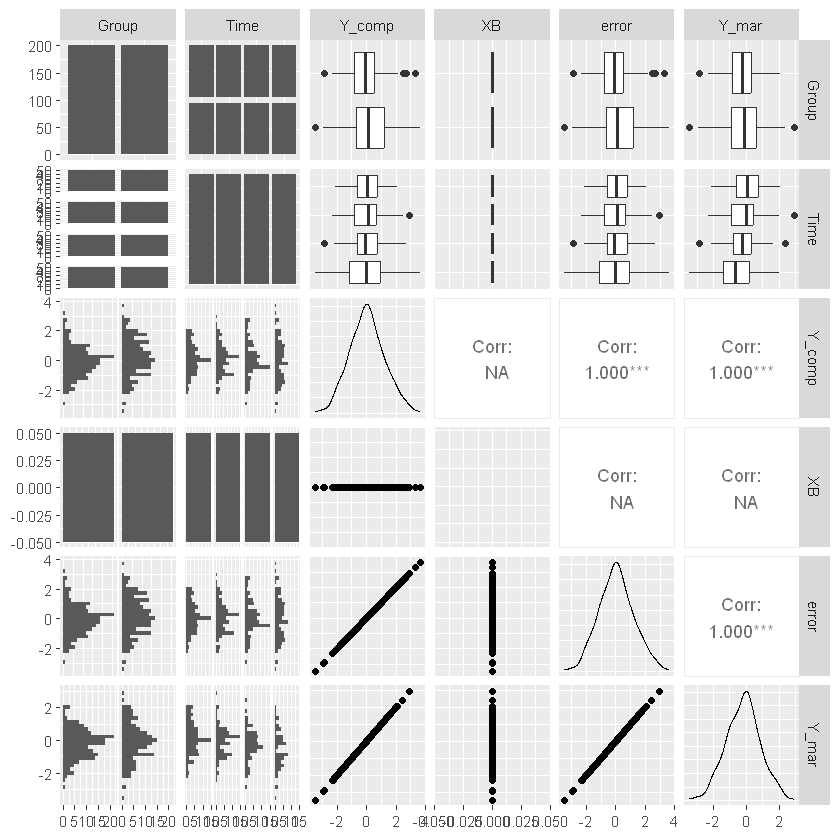

In [83]:
library(GGally)
library(tidyverse)
df1 <- df %>% dplyr::select(Group, Time, Y_comp, XB, error, Y_mar)
ggpairs(df1)


USUBJID omitted, because this variable has more than 15 levels.

## Assumptions mixed model repeated measure

- 


TODO: Check completeness of the assumptions and add example code for the checks.

## Coding of categorical variables

- Group
- Time

If using character variables, the first level of the alphabetic sort order will be regardes as reference level.

For some functions the character variable has to be converted to a factor, e.g., for the contrasts() fucntion


In [84]:
table(df$Group)
table(df$Time)


Group_1 Group_2 
    200     200 


Time_1 Time_2 Time_3 Time_4 
   100    100    100    100 

In [85]:
contrasts(as.factor(df$Group))
contrasts(as.factor(df$Time))

,Group_2
Group_1,0
Group_2,1


,Time_2,Time_3,Time_4
Time_1,0,0,0
Time_2,1,0,0
Time_3,0,1,0
Time_4,0,0,1


Dummy coding is the default coding.

## Fit the model


In [86]:
library(SPR)
library(MASS)
library(glmmTMB) # https://cran.r-project.org/web/packages/glmmTMB/vignettes/covstruct.html
library(emmeans)
library(nlme)
library(lme4)
library(broom)
my_gls <- nlme::gls(Y_comp ~ Group + Time + Group*Time,
                       data = df07,
                       correlation = corSymm(form = ~ 1 | USUBJID),    #  unstructured correlation
                       weights = varIdent(form = ~ 1 | Time),          #  estimate variance at subsequent timepoints
                       na.action = na.exclude)
summary(my_gls)

Generalized least squares fit by REML
  Model: Y_comp ~ Group + Time + Group * Time 
  Data: df07 
     AIC      BIC    logLik
  1036.4 1107.883 -500.2002

Correlation Structure: General
 Formula: ~1 | USUBJID 
 Parameter estimate(s):
 Correlation: 
  1     2     3    
2 0.779            
3 0.574 0.728      
4 0.484 0.535 0.763
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | Time 
 Parameter estimates:
  Time_1   Time_2   Time_3   Time_4 
1.000000 1.095606 1.217203 1.499564 

Coefficients:
                             Value  Std.Error    t-value p-value
(Intercept)             -0.0693893 0.13692310 -0.5067758  0.6126
GroupGroup_2             0.3336959 0.19363850  1.7232931  0.0856
TimeTime_2              -0.0531747 0.09614668 -0.5530579  0.5805
TimeTime_3               0.0054841 0.14258851  0.0384609  0.9693
TimeTime_4              -0.0566736 0.18351241 -0.3088272  0.7576
GroupGroup_2:TimeTime_2  0.0280852 0.13597194  0.2065512  0.8365
GroupGroup

## Summary of the model

In [87]:
summary(my_gls)

Generalized least squares fit by REML
  Model: Y_comp ~ Group + Time + Group * Time 
  Data: df07 
     AIC      BIC    logLik
  1036.4 1107.883 -500.2002

Correlation Structure: General
 Formula: ~1 | USUBJID 
 Parameter estimate(s):
 Correlation: 
  1     2     3    
2 0.779            
3 0.574 0.728      
4 0.484 0.535 0.763
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | Time 
 Parameter estimates:
  Time_1   Time_2   Time_3   Time_4 
1.000000 1.095606 1.217203 1.499564 

Coefficients:
                             Value  Std.Error    t-value p-value
(Intercept)             -0.0693893 0.13692310 -0.5067758  0.6126
GroupGroup_2             0.3336959 0.19363850  1.7232931  0.0856
TimeTime_2              -0.0531747 0.09614668 -0.5530579  0.5805
TimeTime_3               0.0054841 0.14258851  0.0384609  0.9693
TimeTime_4              -0.0566736 0.18351241 -0.3088272  0.7576
GroupGroup_2:TimeTime_2  0.0280852 0.13597194  0.2065512  0.8365
GroupGroup

## Estimates

In [88]:
# tidy() not supported
df1 <- data.frame("Estimates" = coef(my_gls))
df1


,Estimates
,<dbl>
(Intercept),-0.069389313
GroupGroup_2,0.333695897
TimeTime_2,-0.053174683
TimeTime_3,0.005484079
TimeTime_4,-0.056673629
GroupGroup_2:TimeTime_2,0.028085170
GroupGroup_2:TimeTime_3,-0.126215247
GroupGroup_2:TimeTime_4,-0.146804525


## Confidence intervals

In [89]:
df2 <-intervals(my_gls)
df2

Approximate 95% confidence intervals

 Coefficients:
                              lower         est.     upper
(Intercept)             -0.33858480 -0.069389313 0.1998062
GroupGroup_2            -0.04700401  0.333695897 0.7143958
TimeTime_2              -0.24220234 -0.053174683 0.1358530
TimeTime_3              -0.27484980  0.005484079 0.2858180
TimeTime_4              -0.41746529 -0.056673629 0.3041180
GroupGroup_2:TimeTime_2 -0.23924031  0.028085170 0.2954106
GroupGroup_2:TimeTime_3 -0.52266722 -0.126215247 0.2702367
GroupGroup_2:TimeTime_4 -0.65704098 -0.146804525 0.3634319

 Correlation structure:
             lower      est.     upper
cor(1,2) 0.6883582 0.7791464 0.8459000
cor(1,3) 0.4263403 0.5739051 0.6917156
cor(1,4) 0.3192077 0.4842732 0.6208203
cor(2,3) 0.6214156 0.7283397 0.8086294
cor(2,4) 0.3790272 0.5347039 0.6609483
cor(3,4) 0.6672953 0.7631717 0.8341672

 Variance function:
           lower     est.    upper
Time_2 0.9673921 1.095606 1.240812
Time_3 1.0336540 1.217203 1

## Anova

In [90]:
anova(my_gls)

,numDF,F-value,p-value
,<int>,<dbl>,<dbl>
(Intercept),1,0.7268036,0.39444181
Group,1,2.7222672,0.09975837
Time,3,0.4038847,0.75028908
Group:Time,3,0.2918742,0.83127312


## Residuals


In [91]:
# augment() not supported
df3 <- data.frame("Residuals" = residuals(my_gls))
df3 %>% head()

,Residuals
,<dbl>
1,-0.007346321
2,-0.676279818
3,-1.160301210
4,-0.229472726
5,0.581892064
6,-0.025340927


Only the first rows are displayed.